# Neuron Network

- **Neuron Network**: Build up by multiple layers, each layer have nodes. And each node got a function called 'Activate Function". And the input will be applied by this function to get output

### Neuron Network Types

#### Single Layer

![Image](./image/SingleLayer.png)

#### Multiple Layer

![Image](./image/MultipleLayer.png)

#### Layer Computation

![Image](./image/HiddenLayer.png)

- Each neuron in the hidden layer functions similarly to a machine learning module, equipped with its own set of parameters (weights $w$ and bias $b$), and computes an activation value $a$.

- **Activation Function**: Utilizes the function. Ex: logistic function $g(z) = \frac{1}{1 + e^{-z}}$, where $z = w \cdot x + b$.

- **Activation Values**: Each neuron outputs an activation value $a_i$, calculated from its function. These values represent more abstract features or concepts derived from the input features. The result of previous layer will be the input of the next layer. 


### Example: Digit Number Recognizer

#### Import library

In [1]:
import pandas as pd 
import numpy as np 
import tensorflow as tf 
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

#### Load Data

In [2]:
data = pd.read_csv('./Dataset.csv')
X_value = tf.convert_to_tensor(data.drop(['label'], axis = 1))
Y_value = tf.convert_to_tensor(data['label'])
Y_value = to_categorical(Y_value, num_classes=10)


train_test_ratio = 0.7 

X_train = X_value[:int(len(X_value) * train_test_ratio)]
Y_train = Y_value[:int(len(Y_value) * train_test_ratio)]

X_test = X_value[int(len(X_value) * train_test_ratio):]
Y_test = Y_value[int(len(Y_value) * train_test_ratio):]

print(X_train.shape, Y_train.shape)

(29399, 784) (29399, 10)


#### Module Creation

In [3]:
image_shape = (784)  

model = Sequential([
    Input(shape=image_shape),
    Dense(250, activation='sigmoid'),
    Dense(100, activation='sigmoid'), 
    Dense(20, activation='sigmoid'), 
    Dense(10, activation='softmax')
])

model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

#### Train module

In [4]:
history = model.fit(X_train, Y_train, epochs= 10, batch_size= 128)

Epoch 1/10
230/230 [==============================] - 1s 3ms/step - loss: 1.3171 - accuracy: 0.7488
Epoch 2/10
230/230 [==============================] - 1s 3ms/step - loss: 0.5374 - accuracy: 0.8986
Epoch 3/10
230/230 [==============================] - 1s 3ms/step - loss: 0.3342 - accuracy: 0.9182
Epoch 4/10
230/230 [==============================] - 1s 3ms/step - loss: 0.2648 - accuracy: 0.9297
Epoch 5/10
230/230 [==============================] - 1s 3ms/step - loss: 0.2283 - accuracy: 0.9359
Epoch 6/10
230/230 [==============================] - 1s 3ms/step - loss: 0.2062 - accuracy: 0.9416
Epoch 7/10
230/230 [==============================] - 1s 3ms/step - loss: 0.1895 - accuracy: 0.9457
Epoch 8/10
230/230 [==============================] - 1s 3ms/step - loss: 0.1771 - accuracy: 0.9496
Epoch 9/10
230/230 [==============================] - 1s 3ms/step - loss: 0.1728 - accuracy: 0.9499
Epoch 10/10
230/230 [==============================] - 1s 3ms/step - loss: 0.1597 - accuracy: 0.9531

#### Plotting Graph

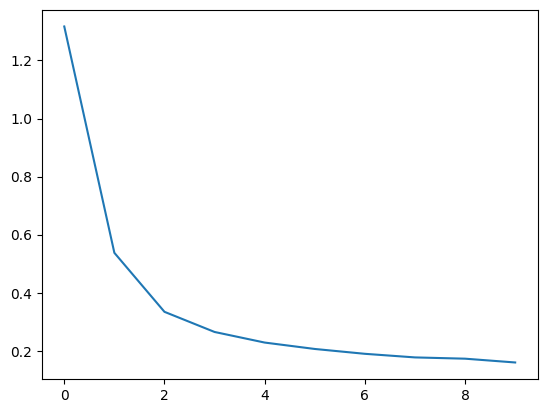

In [5]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

In [9]:
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=2)
print("Test Accurracy:", test_acc)
print("Test Loss:", test_loss)

394/394 - 0s - loss: 0.1715 - accuracy: 0.9494 - 210ms/epoch - 532us/step
Test Accurracy: 0.9494484663009644
Test Loss: 0.17153391242027283
